### I used Collab notebook for running code in this file, since there are no gpu on my laptop. To run this notebook, I would upload the image I got on the previous file to google drive and mount the contents. 

In [0]:
%tensorflow_version 1.x
import tensorflow

TensorFlow 1.x selected.


In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from PIL import Image
import numpy as np
import os

Using TensorFlow backend.


In [0]:
# # fix random seed for reproducibility
# seed = 7
# np.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

In [0]:
# one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [0]:
# pip install tensorflow-gpu==1.14 ## downgrade to support Keras

In [0]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=200)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/2





60000/60000 [==============================] - 40s 667us/step - loss: 0.4884 - acc: 0.8416 - val_loss: 0.0807 - val_acc: 0.9746
Epoch 2/2
60000/60000 [==============================] - 39s 656us/step - loss: 0.1557 - acc: 0.9528 - val_loss: 0.0527 - val_acc: 0.9839


In [0]:
# Final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.05268567152149044, 0.9839]


In [0]:
#mount google drive data into colab notebook
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Make prediction

In [0]:
def make_prediction(filename):
  image = Image.open("/content/drive/My Drive/Location plot/" + filename).convert("RGB")
  invert_img = PIL.ImageOps.invert(image)   #invert image
  invert_img = np.asarray(invert_img)   #convert image to nparray

  gray_img = color.rgb2gray(invert_img) #convert to grayscale
  gray_img = resize(gray_img, (28, 28)) #resize to fit network
  # plt.imshow(gray_img);

  im2arr = gray_img.reshape(1,28,28,1) #reshape

  y_pred = model.predict_classes(im2arr) #make prediction
  print(y_pred)

  return gray_img

[5]
[7]
[5]
[5]
[5]






<Figure size 432x288 with 0 Axes>

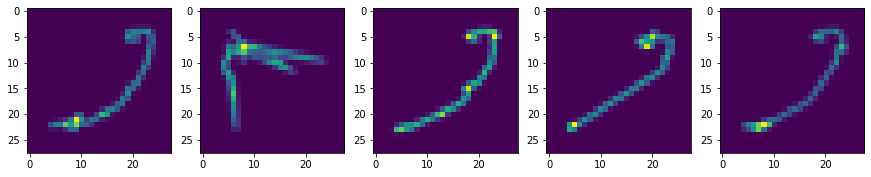

In [0]:

# a = make_prediction("18_18_Dv0 (1).png")
# b = make_prediction("18_18_Dv1 (1).png")
# c = make_prediction("18_18_Dv2 (1).png")
# d = make_prediction("18_18_Dv3 (1).png")
# e = make_prediction("18_18_Dv4 (1).png")


a = make_prediction("18_18_Dv0.png")
b = make_prediction("18_18_Dv1.png")
c = make_prediction("18_18_Dv2.png")
d = make_prediction("18_18_Dv3.png")
e = make_prediction("18_18_Dv4.png")
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,5,figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(a)
axarr[1].imshow(b)
axarr[2].imshow(c)
axarr[3].imshow(d)
axarr[4].imshow(e)

print ("")
print ("")
print ("")
print ("")

[4]
[1]
[3]
[1]
[3]
Ground truth for Oct 18, 16:34 to 42: Abbie-1 and Gabi-2, Britney-3 and Ella-4



<Figure size 432x288 with 0 Axes>

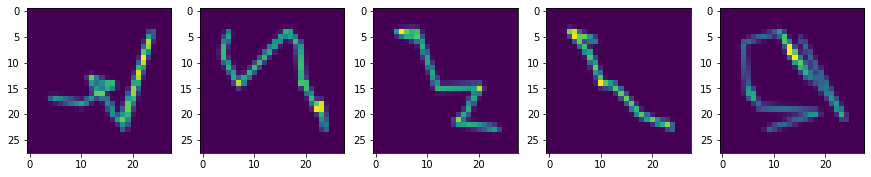

In [0]:

a = make_prediction("Abbie_16_32_2.png")
b = make_prediction("Gabi_16_32_2.png")
c = make_prediction("Britney_16_32_2.png")
d = make_prediction("Ella_16_32_2.png")
e = make_prediction("Samer_16_32_2.png")


plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,5,figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(a)
axarr[1].imshow(b)
axarr[2].imshow(c)
axarr[3].imshow(d)
axarr[4].imshow(e)

print ("Ground truth for Oct 18, 16:34 to 42: Abbie-1 and Gabi-2, Britney-3 and Ella-4")
print ("")


[2]
[3]
[1]
[2]
[4]
Ground truth for Oct 18, 18:12 Britney(3) walking + talking w-Gabi(2) @ parallel w- Abbie(1) and Ella(4)
1,2,3,4 should have the same label, 5 should have different label


<Figure size 432x288 with 0 Axes>

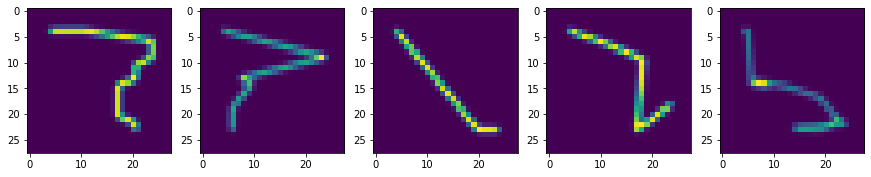

In [0]:

a = make_prediction("Abbie_18_12.png")
b = make_prediction("Gabi_18_12.png")
c = make_prediction("Britney_18_12.png")
d = make_prediction("Ella_18_12.png")
e = make_prediction("Samer_18_12.png")


plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,5,figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(a)
axarr[1].imshow(b)
axarr[2].imshow(c)
axarr[3].imshow(d)
axarr[4].imshow(e)

print ("Ground truth for Oct 18, 18:12 Britney(3) walking + talking w-Gabi(2) @ parallel w- Abbie(1) and Ella(4)")
print ("1,2,3,4 should have the same label, 5 should have different label")


[3]
[2]






<Figure size 432x288 with 0 Axes>

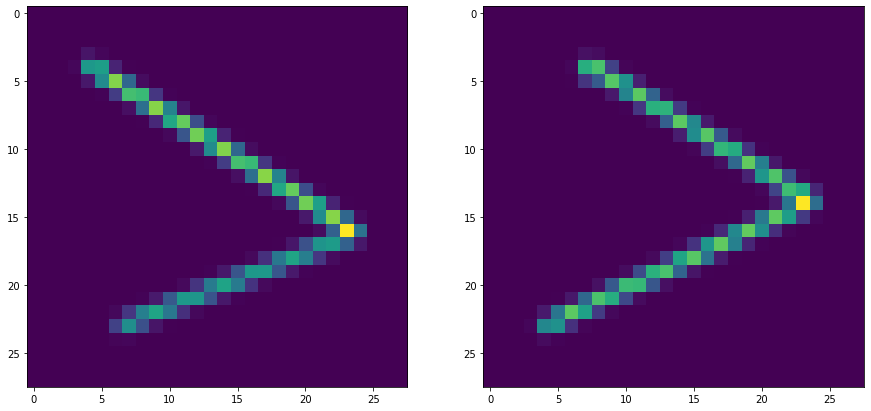

In [0]:
a = make_prediction("1.png")
b = make_prediction("2.png")

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2,figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(a)
axarr[1].imshow(b)


print ("")
print ("")
print ("")
print ("")

[3]
[2]






<Figure size 432x288 with 0 Axes>

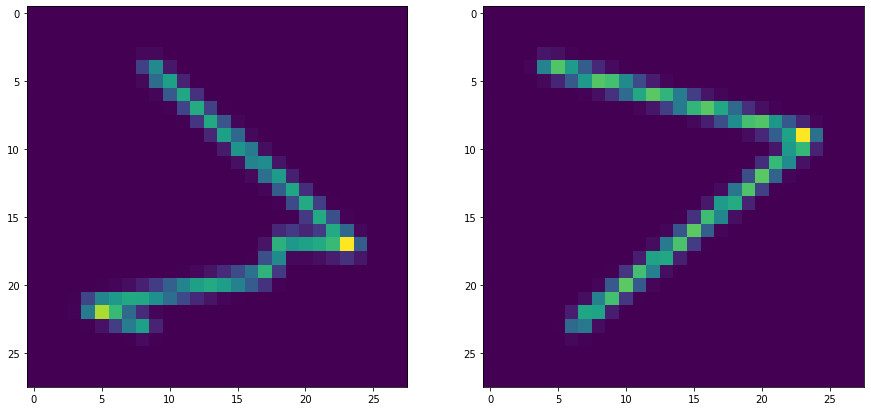

In [0]:
a = make_prediction("9.png")
b = make_prediction("10.png")

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2,figsize=(15,15)) 


axarr[0].imshow(a)
axarr[1].imshow(b)


print ("")
print ("")
print ("")
print ("")

[1]
[1]






<Figure size 432x288 with 0 Axes>

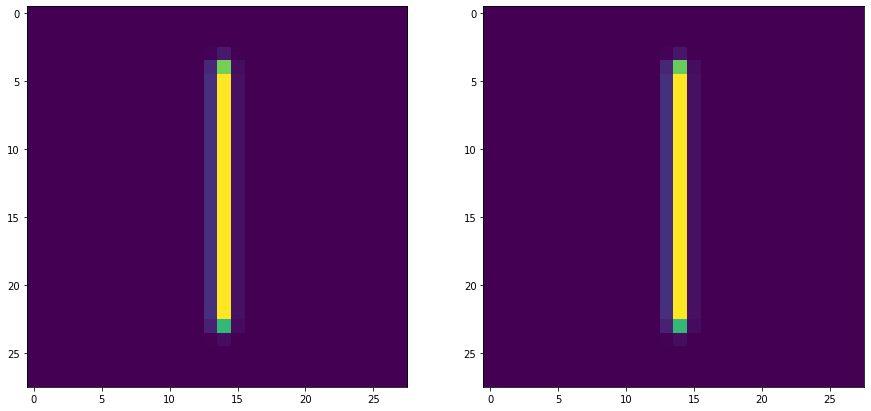

In [0]:
a = make_prediction("11.png")
b = make_prediction("12.png")

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2,figsize=(15,15)) 


axarr[0].imshow(a)
axarr[1].imshow(b)


print ("")
print ("")
print ("")
print ("")